In [27]:
# Adrian Marinovich
# Springboard - Data Science Career Track
# Inferential Statistics Exercise 1
# October 1, 2018

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

NOTE:

The supporting information provided above states that "Data were constructed to match as closely as possible the histograms and summary statistics presented in that article." This implies the data provided are not the original data, and may differ from the original data in unknown ways. 

Review of the abstract of the article from which the data were obtained (JAMA. 1992 Sep 23-30;268(12):1578-80) (the full article is not freely  accessible), notes that the data were obtained during baseline study  from 148 healthy men and women aged 18 through 40 years who were  participating in a Shigella vaccine trial, using an oral thermometer  to obtain temperatures one to four times daily for three consecutive  days. 

Since the dataset here consists only of 130 readings, it is unknown what subsamping criteria were applied to obtain the subset of data,  whether the data are from 130 unique patients among the larger  group of 148 patients, or whether the temperature readings are from  the same time of day for each patient.

No information is provided on selection criteria for the study (aside from 'healthy'), patient's medical history, evaluation for symptoms  and signs of infection, recent physical exertion, pregnancy status  or time in menstruation cycle as appropriate, time since last meal,  and time of measurement, all of which might have an impact on body  temperature, and which would provide information about the sampled population.

The presence of the 100.8 degree F outlier (descibed below) also behooves further inquiry into this patient and circumstances of this measurement, and raises the question of how carefully patients were screened before  their data were contributed. 

Answers are provided below with these caveats in mind, for the  purposes of completing the exercises only. 

The dataset in its current form and context does not  appear to be  appropriate for drawing conclusions about "normal" body temperature  ranges. 

In [28]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [29]:
# Check data
df.shape

(130, 3)

In [30]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Question 1. _Is the distribution of body temperatures normal?_ 

In [31]:
# 1. (continued...) 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

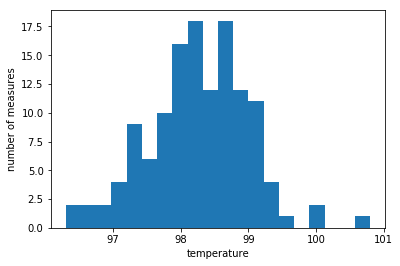

In [32]:
# 1. (continued...)
# Plot histogram of temperatures
%matplotlib inline
a = plt.hist(df['temperature'], bins=20)
a = plt.xlabel('temperature')
a = plt.ylabel('number of measures')

plt.show()

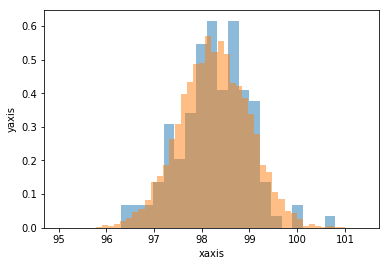

In [33]:
# 1. (continued...)
# Plot probability density histogram of temperatures (in blue)
#  with overlay of a random normal distribution (in orange) 
#  created using mean and standard deviation of temperatures
%matplotlib inline
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
normals = np.random.normal(mean, std, size=10000)

t = plt.hist(df['temperature'],density=True,alpha=0.5,bins=20)
n = plt.hist(normals,density=True,alpha=0.5,bins=50)
lx = plt.xlabel('xaxis')
ly = plt.ylabel('yaxis')
plt.show()

Question 1. (continued...)

While visual inspection of the above plot shows substantial overlap of the normal and temperature distributions, there are temperatures at the tails, particularly the right tail, that give concern. 

So we'll test for normality, first using a 'back-of-the-envelope test', seeing if there is a 3sigma, or in this case a 3s event which is not expected in a  sample size of less than 300 (n=130 in this case).

In [34]:
# First print the s, standard deviation, and mean, 
#  calculated above as 'std' and 'mean':
print('s:', std, '\n', 'mean:', mean)

s: 0.7303577789050377 
 mean: 98.24923076923078


In [35]:
# 1. (continued...)
# Then multiply that std by 3, and see if any temperature
#  values fall greater than 3s from the mean.

# Convert dataframe temperatures to numpy array
t_arr = df['temperature'].values

# Check for > 3s outliers
t_arr[ np.abs(t_arr - mean)>3*std ]

array([100.8])

In [36]:
# 1. (continued...)
# Since there is a value greater that 3s from the 
#  mean, we'll do another test of normality,
#  the Anderson-Darling test.
#
from scipy.stats import anderson
result = anderson(t_arr)
print('Statistic: %.3f \nSig. level:' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject null hypothesis)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject null hypothesis)' % (sl, cv))

Statistic: 0.520 
Sig. level:
15.000: 0.560, data looks normal (fail to reject null hypothesis)
10.000: 0.637, data looks normal (fail to reject null hypothesis)
5.000: 0.765, data looks normal (fail to reject null hypothesis)
2.500: 0.892, data looks normal (fail to reject null hypothesis)
1.000: 1.061, data looks normal (fail to reject null hypothesis)


Question 1. (continued...)

Apparently, the 100.8 degree outlier is not enough to tip the distribution out of normality by this test, but nevertheless gives concern about the  origin of this dataset, as explained in the note above.

Question 2. _Is the sample size large? Are the observations independent?_

A sample size of at least 30 is often considered the minimum for the central limit theorem to apply. Therefore, with n=130 in this dataset, we can consider it to be 'large' for that purpose.

The ultimate answer to whether a sample size is 'large', however, depends on the specific hypothesis and effect size anticipated.

As discussed in the note above, not enough information is provided with this dataset to know for sure that each observation is from  a separate unique patient, rather than being from multiple readings from a smaller group of patients. 

IF we can assume that each observation is from a separate unique patient, then the observations would be independent.


Question 3. _Is the true population mean really 98.6 degrees F?_

In [41]:
# 3. (continued...)
# First, try a bootstrap hypothesis test.

def bootstrap_replicate(data, test):
    bs_sample = np.random.choice(data, len(data))
    return test(bs_sample)

In [42]:
bootstrap_replicate(t_arr, np.mean) 

98.18384615384613

In [43]:
bs_replicates = np.empty(10000)

In [44]:
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate(t_arr, np.mean)

In [45]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

In [46]:
conf_int

array([98.12461538, 98.37538462])

Question 3. (continued...)

The 95% confidence interval above does not contain 98.6 using 10,000 bootstrap replicates testing, indicating the population mean is not likely 98.6 degrees F,  with the caveat that we do not really know what the population is that this sample is meant to  represent (see note above).

Question 3. (continued...) _Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?_

This is a one-sample test, since we're working with one sample. We are not comparing two samples. 

Question 3. (continued...) _In this situation, is it appropriate to use the t or z statistic?_

While the the z statistic would not be incorrect to use here, and may be the preferred answer by rote application of an "n > 30  rule", I believe the t statistic is most appropriate here. Use  of the z statistic presumes the population variance is known. We do  not know the population variance here, and it is difficult to  make assumptions about this variance from the sample variance,  as we don't know specifically what the population is (see above  note), how the original sample was obtained from it, or how this  dataset was subsampled from that. When n increases beyond 30 as  is the case here, however, the t statistic gets very close to  the z statistic anyway. Furthermore, as the t statistic is very  commonly used in biomedical research even with n > 30, it is  preferable to continue using it in the same way here.

In [47]:
# This is the test using the t statistic (two-sided)
import scipy
scipy.stats.ttest_1samp(t_arr, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Question 3. (continued...)

The p value here of 0.0000002, is easily < 0.05, and thus we reject the null hypothesis that there is no significant difference between the sample mean and 98.6.

In [48]:
# 3. (continued...)
# Now try using the other test. 

# Obtain the z score of the sample mean against the 98.6 value
z = (mean - 98.6)*np.sqrt(len(t_arr))/std

# Obtain the p value for this z score (two-sided)
p_value = scipy.stats.norm.sf(abs(z))*2
p_value

4.3523151658821886e-08

Question 3. (continued...) _How is the result be different? Why?_

As expected, the z statistic returns a lower p value. This is because the z distribution (the standard normal distribution)  is more narrow than the t distribution. In the context of this  case, however, the difference results in no meaningful difference  in interpretation, compared to the t statistic.

Question 4. _Draw a small sample of size 10 from the data and repeat both frequentist tests._

In [71]:
# 4. (continued...)

# Random sample of 10
t_arr10 = np.random.choice(t_arr, 10)

In [72]:
# 4. (continued...)
# t statistic
scipy.stats.ttest_1samp(t_arr10, 98.6)

Ttest_1sampResult(statistic=-0.2844627935584223, pvalue=0.7824924012588588)

In [73]:
# 4. (continued...)
# z statistic
z = (mean - 98.6)*np.sqrt(len(t_arr10))/std
p_value10 = scipy.stats.norm.sf(abs(z))*2
p_value10

0.12882584068325553

Question 4. (continued...) _Which one is the correct one to use?_

In this case, the t statistic is the better to use, since n < 30.

_What do you notice? What does this tell you about the difference in application of the t and z statistic?_

The z statistic gives the same p value regardless of the sample of 10 temperatures chosen, while the t statistic gives highly variable p values, based on which sample is chosen. The t distribution at this n is wider than the t distribution for the full sample n above. This underscores how the difference between using the t over the z is most pronounced at low n (less than 30).

Question 5. _At what temperature should we consider someone's temperature to be "abnormal"?_

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

In [52]:
# 5. (continued...)
# Use the bootstrap approach to obtain a distribution from 
#  10000 random selections and then findings 2.5% and 97.5% 
#  cutoffs 
conf_int = np.percentile(np.random.choice(t_arr, 10000), [2.5, 97.5])
conf_int

array([96.7, 99.5])

Question 5. (continued...)

By the bootstrap approach, using 2.5 and 97.5 percentile limits, we consider less than 96.7 degrees F, and greater than 99.5 degrees F, to be abnormal temperatures

In [53]:
# 5. (continued...)
# Use frequentist approach to get 2.5 and 97.5 percentile limits
# Generate 10000 values off normal distribution with 
#  our temperatures' mean and standard deviation,
#  and obtain percentile limits from those
conf_int = np.percentile(np.random.normal(mean, std, size=10000), [2.5, 97.5])
conf_int

array([96.83751854, 99.63597273])

Question 5. (continued...)

By the frequentist approach, using 2.5 and 97.5 percentile limits, we consider less than 96.8 degrees F, and greater than 99.6 degrees F, to be abnormal temperatures

Question 6. _Is there a significant difference between males and females in normal temperature?_

In [54]:
# 6. (continued...)
# We will use a two sample t-test for comparing the means between female and male samples

# Convert dataframe female and male temperatures to numpy arrays
#  and print their means
f_df = df[df['gender'] == 'F']
m_df = df[df['gender'] == 'M']

t_f_arr = f_df['temperature'].values
t_m_arr = m_df['temperature'].values

print('Female mean temp:', np.mean(t_f_arr), '\nMale mean temp:', np.mean(t_m_arr))

Female mean temp: 98.39384615384614 
Male mean temp: 98.10461538461537


In [55]:
# Perform two-sample t-test
scipy.stats.ttest_ind(t_f_arr, t_m_arr)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

Question 6. (continued...)

With a p value of 0.024, we reject the null hypothesis of equal means and conclude there is a significant difference (using the  (p<0.05 cutoff) between  female and male temperatures (i.e., mean female temperature is significantly higher than mean male temperature).